# <center><u>**`LOGISTIC REGRESSION`**</u></center>

Hi aspirant, You have already learned simple, multiple and some advance regression techniques. Now lets jump to another hands-on assignment on Logistic regression.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).



## **`Problem statement:`**

#### **`Telecom Churn Case Study`**

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.


So smile please and lets get started with this amazing assignment.

# **`WATCH ALL VIDEOS IN THE PORTAL`**

#### **`Do watch these video for its indepth conceptual clarity:`**

## **`Watch Video 1, 2, 3: Logistic Regression Intuition`**

### **`Importing and Merging Data`**
<p style='text-align: right;'> 4 points</p>


In [180]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np


In [181]:
# Importing all datasets
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [182]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 = pd.merge(churn_data,customer_data,how='inner',on='customerID')


In [183]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')


### Let's understand the structure of our dataframe
<p style='text-align: right;'> 3 points</p>


In [184]:
# Let's see the head of our master dataset

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [185]:
#Lets see statistical description for our master data
telecom.describe()


,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [186]:
# Let's see the type of each column
telecom.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## **`Data Preparation`**
<p style='text-align: right;'> 10 points</p>


In [187]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0})

telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})

telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})

telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})


### **`Dummy Variable Creation`**

As you can see there are many textual information in our data set. Lets do encoding for these classes using get_dummies() function.

Note: use prefix='column_name' where column_name is the column whose encoding has to be done.

In [188]:
# Create dummy variables for the 'Contract' variable
cont = pd.get_dummies(telecom['Contract'], prefix='Contract', drop_first=True)
telecom = pd.concat([telecom, cont], axis=1)

# Create dummy variables for the 'PaymentMethod' variable
pm = pd.get_dummies(telecom['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
telecom = pd.concat([telecom, pm], axis=1)

# Create dummy variables for the 'gender' variable
gen = pd.get_dummies(telecom['gender'], prefix='gender', drop_first=True)
telecom = pd.concat([telecom, gen], axis=1)

# Create dummy variables for the 'MultipleLines' variable
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines', drop_first=True)
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
telecom = pd.concat([telecom, ml1], axis=1)

# Create dummy variables for the 'InternetService' variable
iser = pd.get_dummies(telecom['InternetService'], prefix='InternetService', drop_first=True)
telecom = pd.concat([telecom, iser], axis=1)

# Create dummy variables for the 'OnlineSecurity' variable
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
telecom = pd.concat([telecom, os1], axis=1)

# Create dummy variables for the 'OnlineBackup' variable
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
telecom = pd.concat([telecom, ob1], axis=1)

# Create dummy variables for the 'DeviceProtection' variable
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
telecom = pd.concat([telecom, dp1], axis=1)

# Create dummy variables for the 'TechSupport' variable
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport', drop_first=True)
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
telecom = pd.concat([telecom, ts1], axis=1)

# Create dummy variables for the 'StreamingTV' variable
st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV', drop_first=True)
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
telecom = pd.concat([telecom, st1], axis=1)

# Create dummy variables for the 'StreamingMovies' variable
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
telecom = pd.concat([telecom, sm1], axis=1)


<ipython-input-188-baf98b42654f>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)


### **`Dropping the repeated variables`**

Since We have already created dummies for the below variables
    
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
so we can drop them off as they are now repeated in our master dataset


In [189]:
# drop all duplicate columns
telecom = telecom.drop(['Contract',
'PaymentMethod',
'gender',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies'],axis=1)

The TotalCharges variable was imported as a string we need to convert it to numeric type<br>
Hint: Use pandas.to_numeric() function. Refer:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [190]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')


In [191]:
# again check data type informationof our master dataset
telecom.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### **`Checking for Outliers`**
<p style='text-align: right;'> 4 points</p>


Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [192]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[[ 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]


In [193]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.50,.75,.90,.95,.99])


,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### **`Checking for Missing Values and Inputing Them`**

<p style='text-align: right;'> 5 points</p>


In [194]:
# Checking total missing values (column-wise)
telecom.isnull().sum()


customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                 

In [195]:
# Checking the percentage of missing values
(telecom.isnull().sum()/len(telecom))*100


customerID                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.156183
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
MultipleLines_Yes                        0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
OnlineSecurity_Yes                       0.000000


It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [196]:
# Removing NaN form TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]


In [197]:
# Lets Check percentage of missing values after removing the missing values
telecom.isnull().sum()


customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV

In [198]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,gender_Male,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Now we don't have any missing values

### **`Feature Standardisation`**

<p style='text-align: right;'> 6 points</p>


Standardization is one of the scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:


![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)


We are sure that you have got this Scaling concept clear from your previous assignements. But for the sake of your revision we
provide you with following video.

## **`Watch Video 4 : Normalization  & Standardization`**

In [199]:
# print non null count in df
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [200]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure','MonthlyCharges','TotalCharges']]


In [201]:
# Standardising above continuous features

std_df= (df-df.mean())/df.std()


In [202]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)


<ipython-input-202-dd1d268723d6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)


In [203]:
# Add std_df into telecom
telecom = pd.concat([telecom,std_df],1)

<ipython-input-203-34d5cf522286>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  telecom = pd.concat([telecom,std_df],1)


In [204]:
# print telecom tail
telecom.tail()


,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,0,1,0,1,1,1,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,0,0,1,1,0,1,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1.368012,1.357835,2.012201


### **`Checking the Churn Rate`**

<p style='text-align: right;'> 2 points</p>


In [205]:
#caluclating total churn percentage in our master dataframe
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [206]:
# print churn
print(churn)


26.578498293515356


We have almost 27% churn rate

## **`Model Building`**

<p style='text-align: right;'> 11 points</p>

Let's start by splitting our data into a training set and a test set.

In [207]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop(['customerID','Churn'],1)


# Putting response variable to y
y = telecom['Churn']


<ipython-input-207-019ce68f48fd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = telecom.drop(['customerID','Churn'],1)


In [208]:
# print y head
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### **`Running Your First Training Model`**

In [209]:
# import statsmodels api as sm
import statsmodels.api as sm


Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

Reference:

## **`Watch Video 5, 6 : Logistic Regression by Statsmodel(Theory) + Practical`**
- File Used: https://drive.google.com/file/d/1bGq_HqmXhQSSf9fuL6Duol7QCRI-xxvs/view?usp=sharing
- Dataset: https://www.kaggle.com/datasets/saurabh00007/diabetescsv

### **`Splitting Data into Training and Test Sets`**

In [210]:
# import train_test_split module
from sklearn.model_selection import train_test_split


In [211]:
# adding constant to X
X=sm.add_constant(X)

# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)



In [212]:
# Logistic regression model
logm1 = sm.Logit(y_train,X_train)
logm1.fit().summary()




Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.2912
Time:                        07:15:14   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

Hey buddy, from above you can see that there few statistically insignificant variables present in our dataset. Lets drop them off.

Here drop those variables which has less than 70% confidence to reject the null hyposthesis looking into P values.

Few insignificant variables we can see from above stats summary are:

    partner
    Dependents
    PaymentMethod_Electronic check
    gender_Male
    InternetService_No
    DeviceProtection_no
    DeviceProtection_Yes
    
So lets drop them off from X

Note: We are not dropping const variable as it is required for OLS model building

In [213]:
X= X.drop(['Partner',
'Dependents',
'PaymentMethod_Electronic check',
'gender_Male',
'InternetService_No',

'DeviceProtection_Yes'],1)


<ipython-input-213-ede294c395b6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= X.drop(['Partner',


### **`Correlation Matrix`**

<p style='text-align: right;'> 2 points</p>


In [214]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

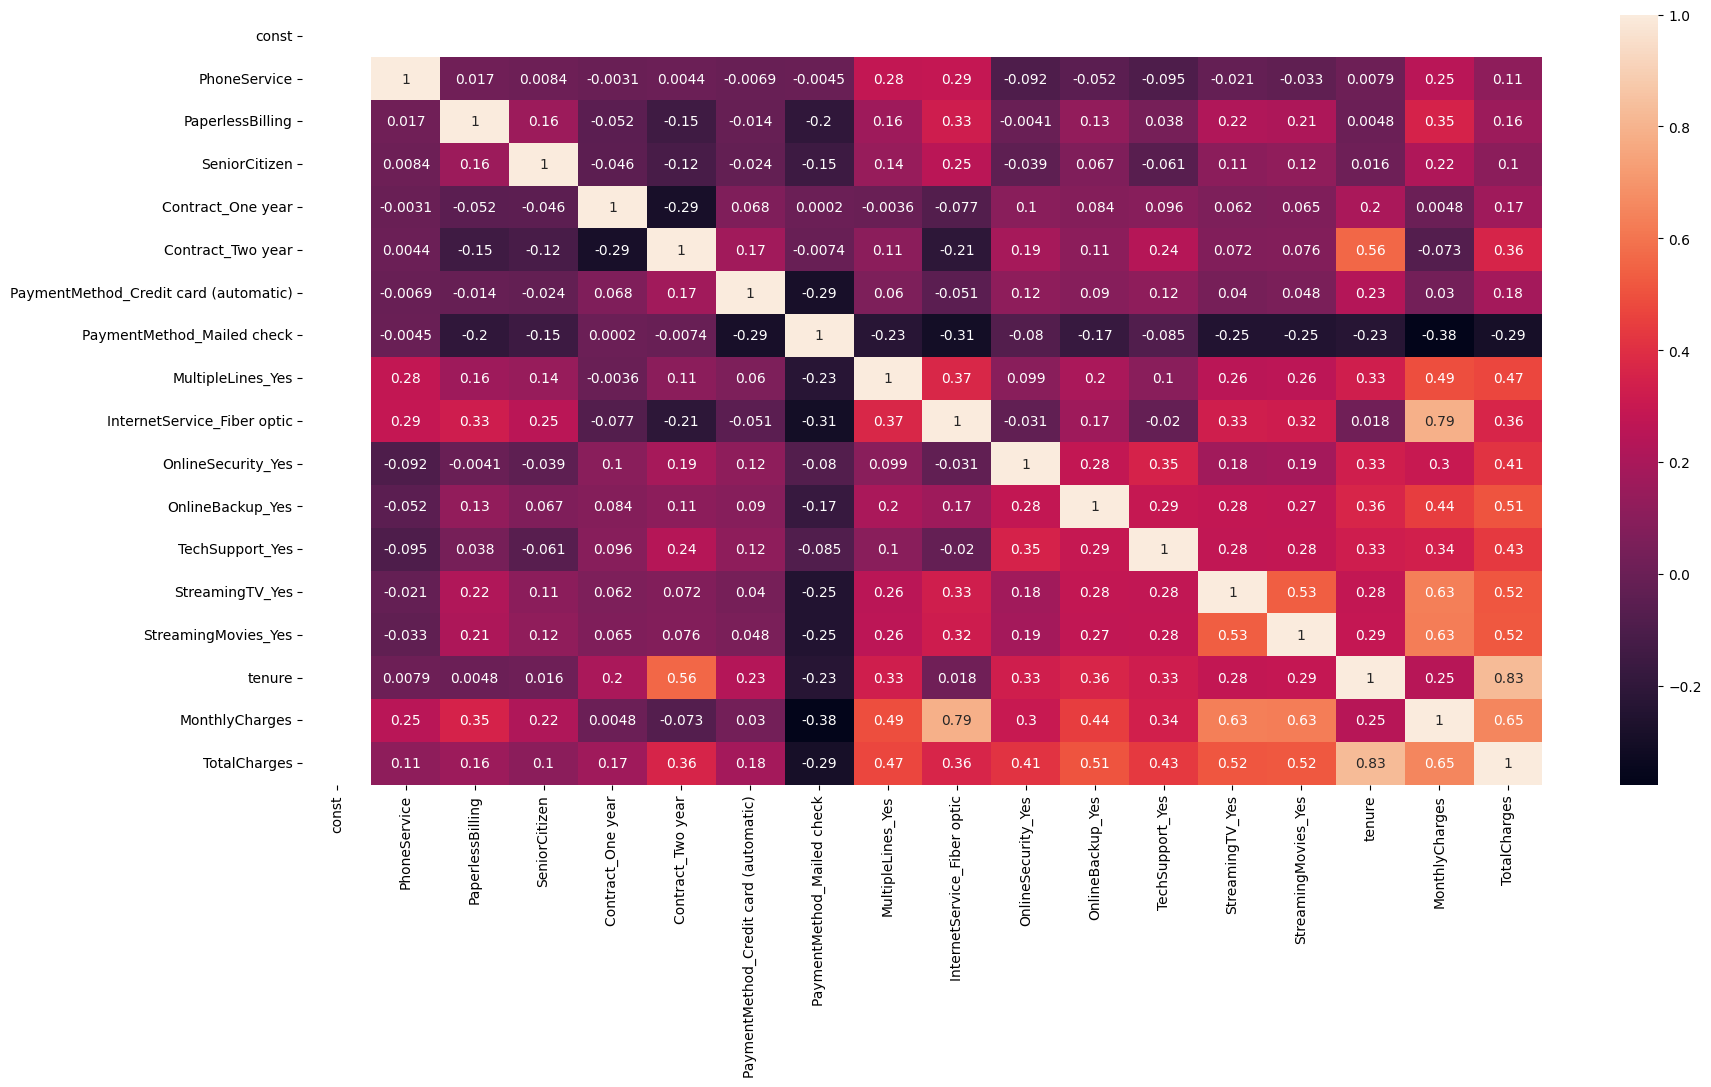

In [215]:
# Let's see the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
       # Size of the figure

plt.show()


### **`Dropping highly correlated variables.`**

<p style='text-align: right;'> 4 points</p>


Check video:
## **`Watch Video 7 : Dropping Highly Correlated Variables`**


In [216]:
def correlation(dataset, threshold):
    # Set of all the names of correlated columns
    col_corr = set()

    # apply corr method on dataset
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Note the indexing (i, j) here
                # getting the name of columns
                colname_i = corr_matrix.columns[i]
                colname_j = corr_matrix.columns[j]
                # add in col_corr
                col_corr.add(colname_i)
                col_corr.add(colname_j)

    # return col_corr
    return col_corr


In [217]:
# call the function with threshold
corr_features = correlation(X,0.7)

len(set(corr_features))

4

In [218]:
# print corr_features


corr_features

{'InternetService_Fiber optic', 'MonthlyCharges', 'TotalCharges', 'tenure'}

In [219]:
# Lets drop the above variables from X
X=X.drop(['InternetService_Fiber optic', 'MonthlyCharges', 'TotalCharges', 'tenure'],1)



<ipython-input-219-5e86a505333d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop(['InternetService_Fiber optic', 'MonthlyCharges', 'TotalCharges', 'tenure'],1)


## **`Dropping Variable with high VIF`**

<p style='text-align: right;'> 5 points</p>


Lets check multicollinearity using Variance inflation factor too!

Reference:
## **`Watch Video 8 : Variance Inflation Factor`**

In [220]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# empyty dataframe
vif = pd.DataFrame()

#variables names with all variables in column X
vif['variables']=X.columns

# Vif scores for corresponding features
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]

In [221]:
# print vif
vif


,variables,VIF
0,const,15.64
1,PhoneService,1.13
2,PaperlessBilling,1.16
3,SeniorCitizen,1.09
4,Contract_One year,1.19
5,Contract_Two year,1.34
6,PaymentMethod_Credit card (automatic),1.16
7,PaymentMethod_Mailed check,1.26
8,MultipleLines_Yes,1.29
9,OnlineSecurity_Yes,1.23


Lets drop variables which are having infinite vif scores.

they are:
    
    OnlineSecurity_No
    OnlineSecurity_Yes
    OnlineBackup_No
    OnlineBackup_Yes
    TechSupport_No
    TechSupport_Yes
    StreamingTV_No
    StreamingTV_Yes
    StreamingMovies_No
    StreamingMovies_Yes

In [222]:
# Lets drop above variables also from X
X=X.drop(['const'],1)



<ipython-input-222-0ef6a4195a0d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop(['const'],1)


### **`Checking the Correlation Matrix again`**

After dropping highly correlated variables now let's check the correlation matrix again.

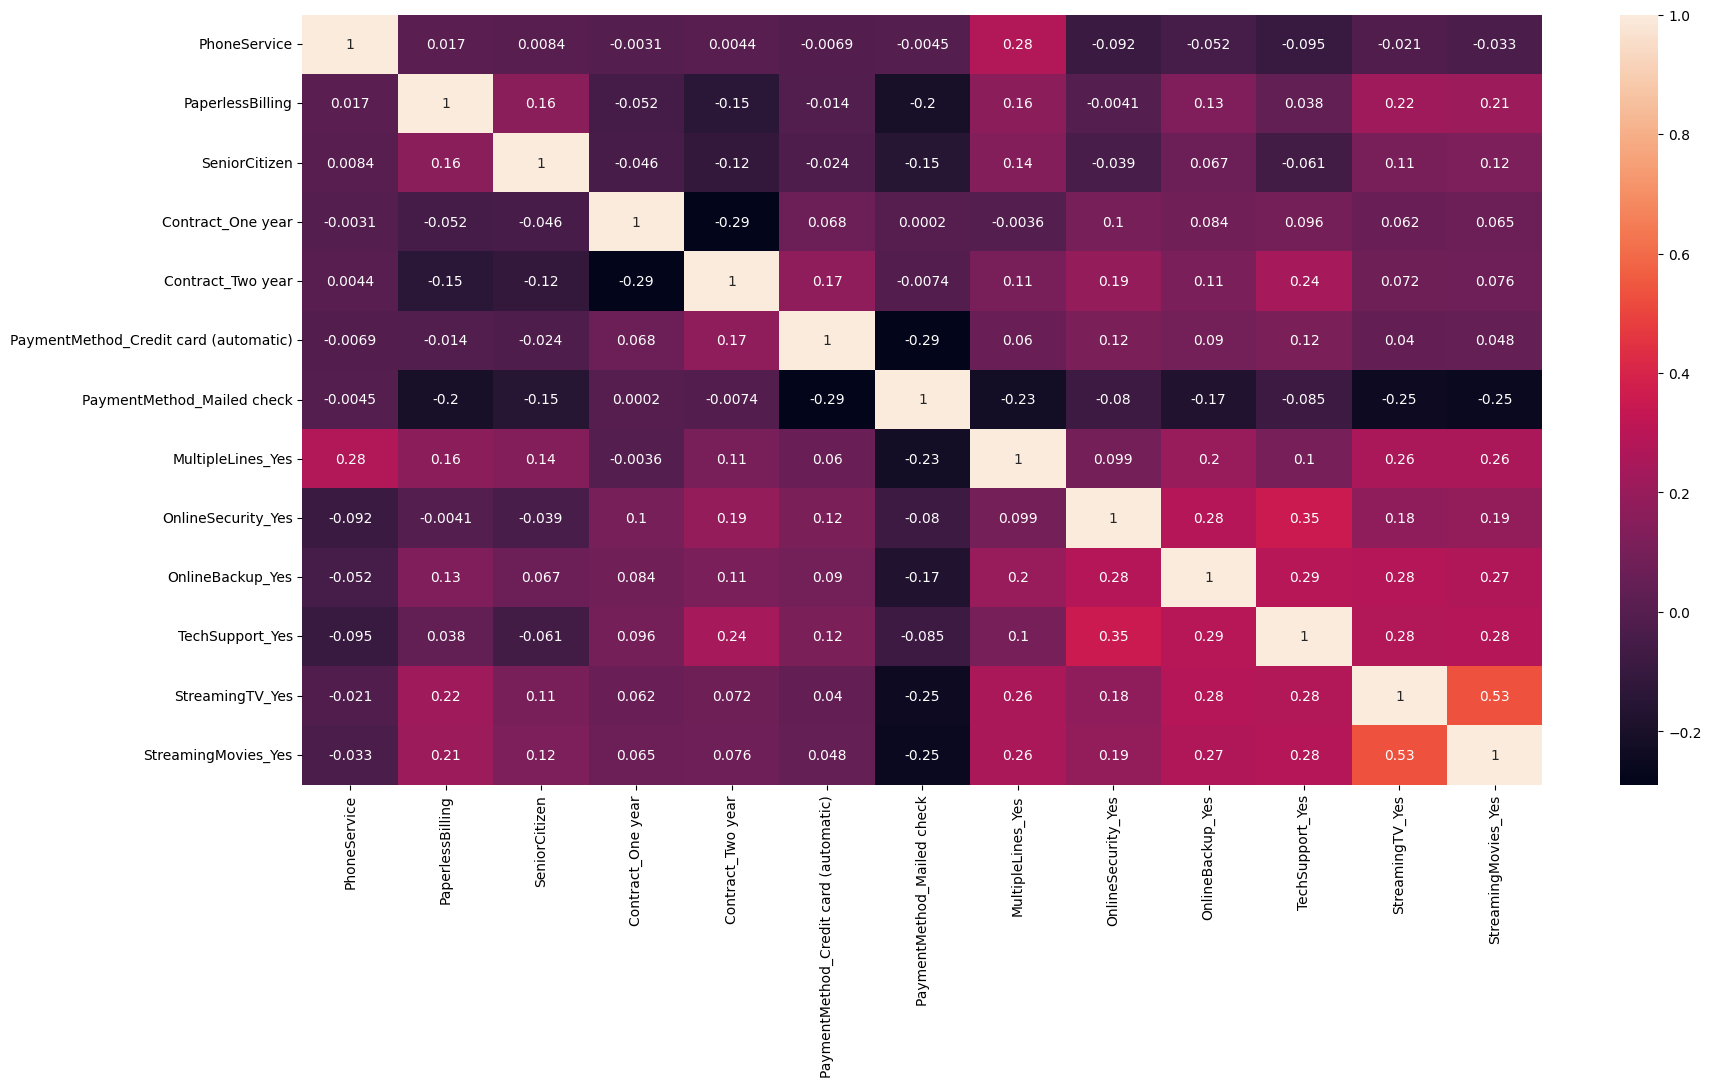

In [223]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
plt.show()


### **`Re-Running the Model`**

<p style='text-align: right;'> 3 points</p>


Now let's run our model again after dropping highly correlated variables

In [224]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# call logit method on sm and pass train data
logm2 = sm.Logit(y_train,X_train)

# call fit and summary on logm2
logm2.fit().summary()


Optimization terminated successfully.
         Current function value: 0.447945
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           12
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.2204
Time:                        07:15:18   Log-Likelihood:                -2204.8
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                1.459e-259
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
PhoneService                             -0.4337      0.080     -5.430      0.000      -0.590      -0.277
PaperlessBilling                          0.3628      0.078      4.630      0.000       0.209       0.516
SeniorCitizen                             0.3981      0.094      4.239      0.000       0.214       0.582
Contract_One year                        -1.6685      0.111    -14.977      0.000      -1.887      -1.450
Contract_Two year                        -2.8920      0.184    -15.747      0.000      -3.252      -2.532
PaymentMethod_Credit card (automatic)    -0.6255      0.106     -5.889      0.000      -0.834      -0.417
PaymentMethod_Mailed check               -0.6369      0.096     -6.637      0.000      -0.825      -0.449
MultipleLines_Yes                         0.1718      0.084      2.040      0.041       0.007       0.337
OnlineSecurity_Yes                       -0.5019      0.097     -5.194      0.000      -0.691      -0.313
OnlineBackup_Yes                         -0.3196      0.085     -3.753      0.000      -0.487      -0.153
TechSupport_Yes                          -0.4114      0.097     -4.231      0.000      -0.602      -0.221
StreamingTV_Yes                           0.3756      0.089      4.230      0.000       0.202       0.550
StreamingMovies_Yes                       0.2320      0.089      2.618      0.009       0.058       0.406
=========================================================================================================
"""

Now you can see after removing all multicollinear features we got all P values to zero,  so now we can say that all features are statistically significant.

### **`Feature Selection Using RFE`**

<p style='text-align: right;'> 5 points</p>


Lets do feature selection using LogisticRegression with RFE

In [225]:
# import RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Initiate LogisticRegression()
logreg = LogisticRegression()


 # Initialise RFE
rfe = RFE(logreg)


# fitting RFE
rfe = rfe.fit(X,y)


# Printing the boolean results
print(rfe.support_)

# Printing the ranking
print(rfe.ranking_)


[False  True False  True  True  True  True False  True False False False
 False]
[8 1 5 1 1 1 1 7 1 6 3 4 2]


In [226]:
# printing column names which were suppported by RFE
X.columns[(rfe.support_)]


Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes'],
      dtype='object')

In [227]:
# Variables selected by RFE
col = X.columns[(rfe.support_)]

In [228]:
# Let's run the model using the selected variables but this time we will use Logistic Regression
# from sklearn import metrics

#initialise Logistic Regression
logsk = LogisticRegression()

#fitting model using above columns as input
logsk.fit(X_train[col],y_train)


LogisticRegression()

In [229]:
#recreating the model with StatsModels with RFE selecte columns

logm3 = sm.Logit(y_train,X_train[col])
logm3.fit().summary()



Optimization terminated successfully.
         Current function value: 0.459130
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.2010
Time:                        07:15:18   Log-Likelihood:                -2259.8
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                1.530e-243
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
PaperlessBilling                          0.3174      0.052      6.109      0.000       0.216       0.419
Contract_One year                        -1.7567      0.106    -16.561      0.000      -1.965      -1.549
Contract_Two year                        -3.0289      0.179    -16.920      0.000      -3.380      -2.678
PaymentMethod_Credit card (automatic)    -0.7409      0.103     -7.216      0.000      -0.942      -0.540
PaymentMethod_Mailed check               -0.9451      0.085    -11.069      0.000      -1.112      -0.778
OnlineSecurity_Yes                       -0.6222      0.092     -6.774      0.000      -0.802      -0.442
=========================================================================================================
"""

### **`Making Predictions`**

<p style='text-align: right;'> 14 points</p>


In [230]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])


In [231]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)


In [232]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]


In [233]:
# Let's see the head
y_pred_1.head()


,1
0,0.403169
1,0.403169
2,0.038893
3,0.376250
4,0.038257


In [234]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [235]:
# Putting CustID to index
y_test_df['CustID']=y_test_df.index


In [236]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)


In [237]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],1)


<ipython-input-237-248da65ac0ba>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  y_pred_final = pd.concat([y_test_df,y_pred_1],1)


In [238]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={1:'Churn_prob'})


In [239]:
#print y_pred_final
y_pred_final


,Churn,CustID,Churn_prob
0,0,942,0.403169
1,1,3730,0.403169
2,0,1761,0.038893
3,1,2283,0.376250
4,0,1872,0.038257
...,...,...,...
2105,0,1289,0.072536
2106,0,3508,0.042412
2107,0,6765,0.069365
2108,0,3598,0.399049


In [240]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','Churn_prob'])


In [241]:
# Let's see the head of y_pred_final
y_pred_final.head()


,CustID,Churn,Churn_prob
0,942,0,0.403169
1,3730,1,0.403169
2,1761,0,0.038893
3,2283,1,0.376250
4,1872,0,0.038257


In [242]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted']=y_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)


In [243]:
# Let's see the head
y_pred_final.head()


,CustID,Churn,Churn_prob,predicted
0,942,0,0.403169,0
1,3730,1,0.403169,0
2,1761,0,0.038893,0
3,2283,1,0.376250,0
4,1872,0,0.038257,0


### **`Model Evaluation`**

<p style='text-align: right;'> 11 points</p>


Choosing the right metric is very important in any classification problem.
To know about various metrics for classification model evaluation refer:




## **`Watch Video 9 & 10 : Performace Measure for Classification(theory + practical)`**

Lets check Confusion matrix for model evaluation:

In [244]:
# import metrics
from sklearn import metrics


In [246]:
# Lets check what all things python provides us in confusion matrix using help function.
help(metrics.confusion_matrix)


Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [248]:
# get Confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)


In [ ]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [249]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.predicted)


0.7554502369668247

In [250]:
# Lets check true positive ,true negatives,false positives and false negatives

TP = confusion[1,1]               # true positive
TN = confusion[0,0]               # true negatives
FP =  confusion[0,1]               # false positives
FN = confusion[1,0]                # false negatives

In [252]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)


0.44329896907216493

In [255]:
# Let us calculate specificity
TN/float(TN+FP)


0.8743455497382199

In [256]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/float(TN+FP))


0.1256544502617801


In [259]:
# positive predictive value
print(TP/float(TP+FP))


0.5733333333333334


In [260]:
# Negative predictive value
print(TN/float(TN+FN))


0.8048192771084337


You can also use classification_report to get precision, recall, f1-score, support

In [261]:
#  import classification_report
from sklearn.metrics import classification_report
# print classification_report
print(classification_report(y_pred_final.Churn,y_pred_final.predicted))


              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1528
           1       0.57      0.44      0.50       582

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.74      0.76      0.74      2110



### **`ROC Curve`**

<p style='text-align: right;'> 1 points</p>


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## **`Watch Video 11 : ROC-AUC`**

In [262]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

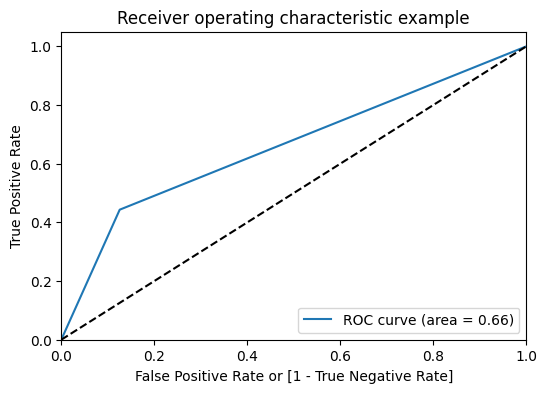

(array([0.        , 0.12565445, 1.        ]),
 array([0.        , 0.44329897, 1.        ]),
 array([2, 1, 0]))

In [263]:
# Use above function to plot ROC curve
draw_roc(y_pred_final.Churn,y_pred_final.predicted)


### **`Finding Optimal Cutoff Point`**

<p style='text-align: right;'> 6 points</p>


Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [265]:
# Let's create columns with different probability cutoffs

numbers = [ float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_prob.map(lambda x:1 if x>i else 0)

# print  y_pred_final head
y_pred_final.head()


,CustID,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.403169,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.403169,0,1,1,1,1,1,0,0,0,0,0
2,1761,0,0.038893,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.376250,0,1,1,1,1,0,0,0,0,0,0
4,1872,0,0.038257,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [270]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 =metrics.confusion_matrix(y_pred_final.Churn,y_pred_final[i])

    #total in cm1
    total1= sum(sum(cm1))

    #Calculate accuracy
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #calculate sensitivity
    sensi =  cm1[1,1]/(cm1[1,0]+cm1[1,1])

    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]

# print cutoff_df

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  1.000000  0.000000
0.1   0.1  0.581517  0.945017  0.443063
0.2   0.2  0.654976  0.869416  0.573298
0.3   0.3  0.714218  0.756014  0.698298
0.4   0.4  0.726540  0.560137  0.789921
0.5   0.5  0.755450  0.443299  0.874346
0.6   0.6  0.724171  0.000000  1.000000
0.7   0.7  0.724171  0.000000  1.000000
0.8   0.8  0.724171  0.000000  1.000000
0.9   0.9  0.724171  0.000000  1.000000


<Axes: xlabel='prob'>

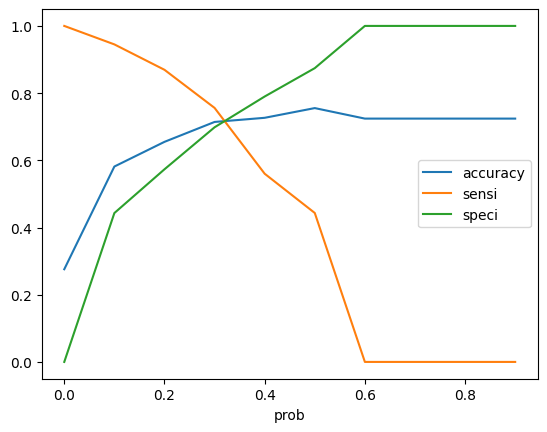

In [271]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])


### **`From the curve above, 0.3 is the optimum point to take it as a cutoff probability.`**

<p style='text-align: right;'> 4 points</p>


In [272]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability
y_pred_final['final_predicted']=y_pred_final.Churn_prob.map(lambda x:1 if x>0.3 else 0)



In [274]:
  y_pred_final.head()


,CustID,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.403169,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.403169,0,1,1,1,1,1,0,0,0,0,0,1
2,1761,0,0.038893,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.376250,0,1,1,1,1,0,0,0,0,0,0,1
4,1872,0,0.038257,0,1,0,0,0,0,0,0,0,0,0,0


In [275]:
#Let's check the overall accuracy now again
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)



0.714218009478673

In [276]:
metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)


array([[1067,  461],
       [ 142,  440]])

Though this approach of finding best cutoff probability is perfectly fine, but as you can see our error got increased when cutoff is 0.3.


The reason may be the features which we used to predict. We need go back and check them again. Else we can even try out different classification problems.


Lets try using all the features available before doing RFE. i.e consider all features in X




In [277]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)



In [279]:
#initialise Logistic Regression
logs2 = LogisticRegression()


#fitting model using above columns as input
logs2.fit(X_train,y_train)


#prediction on test data
y_pred=logs2.predict(X_test)


In [280]:
# print classification_report
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1528
           1       0.57      0.34      0.43       582

    accuracy                           0.75      2110
   macro avg       0.68      0.62      0.63      2110
weighted avg       0.72      0.75      0.72      2110



In [282]:
#print confusion metrix

print(metrics.confusion_matrix(y_test,y_pred))

[[1382  146]
 [ 385  197]]


So from above result we can see that our results are improved slightly after using all the features in X

## **`Summary`**

1. Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.
2. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)

















So in this assignment you learned when to use and how to use logistic regression and what all important metrics we can look for.

Well done buddy. So far so good.!

------------------------------

# Oh yeah! Congratulations you have made your first classification alogorithm! Very well done.

-------------------------------------

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

**Please fill this feedback form**
 https://zfrmz.in/MtRG5oWXBdesm6rmSM7N

_______________________________